# Deep Learning Project: Adimmision Data by Regression

**Problem Description:** \
    For this project, you will create a deep learning regression model that predicts 
the likelihood that a student applying to graduate school will be accepted based
on various application factors (such as test scores).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

## Oberving the given data 

In [3]:
df = pd.read_csv('admissions_data.csv')
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [4]:
df.columns

df.shape # (rows, columns)

(500, 9)

In [5]:
df.memory_usage(index = True) # returns memory usage of each column in bytes

Index                 128
Serial No.           4000
GRE Score            4000
TOEFL Score          4000
University Rating    4000
SOP                  4000
LOR                  4000
CGPA                 4000
Research             4000
Chance of Admit      4000
dtype: int64

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Split the data into features and labels

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(type(X))
print(type(y))
X.head
y.head

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<bound method NDFrame.head of 0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64>

### Preprocessing data

In [21]:
# Split the data into training and test data
trainX, testX, trainy, testy = train_test_split(X, y, test_size = .25, random_state = 45) # test set range between 0.20 and 0.35

# Normalise our data
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX) # turned into a numpy array
testX = scaler.transform(testX)

In [22]:
# Review our data
print(trainX.shape) # (375, 8)
print('trainX: \r\n', trainX[:5, :])

print(testX.shape) # (125, 8)
print('testX: \r\n', testX[:5, :])

(375, 8)
trainX: 
 [[ 0.94547269 -1.25039576 -1.0007892  -0.95826848 -0.85125512  0.02341339
  -0.98956832 -1.1100193 ]
 [ 0.97290367 -0.18229004 -0.83257049 -0.95826848 -1.35715159 -1.07408935
  -0.52477443 -1.1100193 ]
 [ 1.30207542  0.1737452   0.51317922 -1.83260104 -0.85125512  0.02341339
  -0.02678098  0.90088523]
 [ 0.58886997 -0.36030766  0.00852308  0.79039663  1.17233075  0.57216476
   0.15581662  0.90088523]
 [-1.61246609 -0.80535171  0.34496051 -0.08393593  0.66643428 -0.52533798
  -0.9231692   0.90088523]]
(125, 8)
testX: 
 [[-0.30263685 -1.606431   -0.32791435 -0.08393593  0.16053781  0.57216476
  -0.02678098 -1.1100193 ]
 [ 1.59695844  0.61878925  0.00852308  0.79039663 -0.34535865 -1.07408935
  -0.12637967  0.90088523]
 [ 0.32827567 -0.53832528  0.00852308 -0.08393593  0.16053781  0.02341339
   0.18901618 -1.1100193 ]
 [-1.44102247 -1.07237814 -0.32791435 -1.83260104 -0.34535865 -2.17159209
  -1.75315828 -1.1100193 ]
 [ 0.34199116  1.24185092  1.18605408 -0.08393593  1.

### K-fold cross validation (optional)

## Create a deep network for regression
### (i) linear regression model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

n_inputs = trainX.shape[1]

# Approach 1: design a network model using Sequential()
def design_linear_model(features):
    
    model = Sequential(name = 'regression_net_v1')
    
    input = layers.InputLayer(input_shape = (features.shape[1], ))
    model.add(input)
    
    hidden_1 = layers.Dense(128, activation = 'relu')
    model.add(hidden_1)
    
    output = layers.Dense(1)
    model.add(output)
    
    opt = Adam(learning_rate = 1e-3)
    model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)
    
    model.summary()
    
    return model


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# Approach 2: design a network model using Model()
def design_linear_model_2(features):
    
    inputs = Input(shape = (features.shape[1], ))
    x = Dense(128, activation = 'relu')(inputs)
    output = Dense(1, activation = 'relu')(x)
    
    model = Model(inputs = inputs, outputs = output, name = 'regression_net_v2')
    opt = Adam(learning_rate = 1e-3)
    model.compile(loss = 'mse',
                  metrics = ['mae'],
                  optimizer = opt) # 'accuracy' is not needed for regression problem
    
    model.summary()
    
    return model

In [38]:
from keras.utils import plot_model

# my_model = design_model(trainX)

my_model = design_linear_model_2(trainX)


# plot_model(my_model, to_file = 'model.png')


Model: "regression_net_v2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


## Train and evaluate our model

In [63]:
from keras.callbacks import EarlyStopping

# Set an early stopping callback
callback = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Train the model
print('[INFO] Fitting model...')
history = my_model.fit(trainX, trainy, validation_split = .25, epochs = 400, batch_size = 32, verbose = 1)
print('[INFO] Evaluating model...')

# Evaluate the model
loss = my_model.evaluate(testX, testy, verbose = 0)

[INFO] Fitting model...
Epoch 1/400
9/9 [==============================] - 0s 7ms/step - loss: 6.0696e-05 - mae: 0.0061 - val_loss: 0.0055 - val_mae: 0.0530
Epoch 2/400
9/9 [==============================] - 0s 5ms/step - loss: 5.5224e-05 - mae: 0.0057 - val_loss: 0.0052 - val_mae: 0.0515
Epoch 3/400
9/9 [==============================] - 0s 5ms/step - loss: 3.1149e-05 - mae: 0.0042 - val_loss: 0.0052 - val_mae: 0.0516
Epoch 4/400
9/9 [==============================] - 0s 5ms/step - loss: 3.8381e-05 - mae: 0.0045 - val_loss: 0.0054 - val_mae: 0.0530
Epoch 5/400
9/9 [==============================] - 0s 5ms/step - loss: 3.6217e-05 - mae: 0.0046 - val_loss: 0.0052 - val_mae: 0.0517
Epoch 6/400
9/9 [==============================] - 0s 5ms/step - loss: 3.3126e-05 - mae: 0.0044 - val_loss: 0.0053 - val_mae: 0.0517
Epoch 7/400
9/9 [==============================] - 0s 5ms/step - loss: 3.1552e-05 - mae: 0.0042 - val_loss: 0.0052 - val_mae: 0.0516
Epoch 8/400
9/9 [============================

Epoch 62/400
9/9 [==============================] - 0s 4ms/step - loss: 4.2955e-05 - mae: 0.0047 - val_loss: 0.0053 - val_mae: 0.0522
Epoch 63/400
9/9 [==============================] - 0s 4ms/step - loss: 3.5466e-05 - mae: 0.0046 - val_loss: 0.0053 - val_mae: 0.0520
Epoch 64/400
9/9 [==============================] - 0s 5ms/step - loss: 3.1346e-05 - mae: 0.0042 - val_loss: 0.0053 - val_mae: 0.0523
Epoch 65/400
9/9 [==============================] - 0s 6ms/step - loss: 2.2778e-05 - mae: 0.0036 - val_loss: 0.0054 - val_mae: 0.0520
Epoch 66/400
9/9 [==============================] - 0s 5ms/step - loss: 1.4797e-05 - mae: 0.0030 - val_loss: 0.0053 - val_mae: 0.0518
Epoch 67/400
9/9 [==============================] - 0s 5ms/step - loss: 1.4609e-05 - mae: 0.0027 - val_loss: 0.0053 - val_mae: 0.0519
Epoch 68/400
9/9 [==============================] - 0s 5ms/step - loss: 1.4415e-05 - mae: 0.0029 - val_loss: 0.0055 - val_mae: 0.0526
Epoch 69/400
9/9 [==============================] - 0s 5ms/ste

9/9 [==============================] - 0s 4ms/step - loss: 4.5326e-05 - mae: 0.0052 - val_loss: 0.0054 - val_mae: 0.0524
Epoch 123/400
9/9 [==============================] - 0s 5ms/step - loss: 7.0779e-05 - mae: 0.0062 - val_loss: 0.0059 - val_mae: 0.0551
Epoch 124/400
9/9 [==============================] - 0s 5ms/step - loss: 1.4539e-04 - mae: 0.0091 - val_loss: 0.0052 - val_mae: 0.0528
Epoch 125/400
9/9 [==============================] - 0s 5ms/step - loss: 2.2281e-04 - mae: 0.0111 - val_loss: 0.0060 - val_mae: 0.0559
Epoch 126/400
9/9 [==============================] - 0s 4ms/step - loss: 3.7333e-04 - mae: 0.0135 - val_loss: 0.0055 - val_mae: 0.0540
Epoch 127/400
9/9 [==============================] - 0s 5ms/step - loss: 5.4733e-04 - mae: 0.0175 - val_loss: 0.0072 - val_mae: 0.0608
Epoch 128/400
9/9 [==============================] - 0s 5ms/step - loss: 5.3576e-04 - mae: 0.0189 - val_loss: 0.0057 - val_mae: 0.0542
Epoch 129/400
9/9 [==============================] - 0s 5ms/step - lo

9/9 [==============================] - 0s 4ms/step - loss: 2.1049e-05 - mae: 0.0034 - val_loss: 0.0053 - val_mae: 0.0519
Epoch 183/400
9/9 [==============================] - 0s 5ms/step - loss: 1.7413e-05 - mae: 0.0032 - val_loss: 0.0054 - val_mae: 0.0526
Epoch 184/400
9/9 [==============================] - 0s 4ms/step - loss: 1.8762e-05 - mae: 0.0032 - val_loss: 0.0056 - val_mae: 0.0532
Epoch 185/400
9/9 [==============================] - 0s 5ms/step - loss: 3.5003e-05 - mae: 0.0042 - val_loss: 0.0053 - val_mae: 0.0520
Epoch 186/400
9/9 [==============================] - 0s 4ms/step - loss: 3.3135e-05 - mae: 0.0043 - val_loss: 0.0054 - val_mae: 0.0525
Epoch 187/400
9/9 [==============================] - 0s 5ms/step - loss: 3.0664e-05 - mae: 0.0043 - val_loss: 0.0055 - val_mae: 0.0532
Epoch 188/400
9/9 [==============================] - 0s 4ms/step - loss: 1.7137e-05 - mae: 0.0031 - val_loss: 0.0054 - val_mae: 0.0522
Epoch 189/400
9/9 [==============================] - 0s 5ms/step - lo

Epoch 243/400
9/9 [==============================] - 0s 5ms/step - loss: 1.0124e-05 - mae: 0.0024 - val_loss: 0.0054 - val_mae: 0.0525
Epoch 244/400
9/9 [==============================] - 0s 5ms/step - loss: 1.1683e-05 - mae: 0.0026 - val_loss: 0.0054 - val_mae: 0.0528
Epoch 245/400
9/9 [==============================] - 0s 4ms/step - loss: 1.8599e-05 - mae: 0.0033 - val_loss: 0.0054 - val_mae: 0.0523
Epoch 246/400
9/9 [==============================] - 0s 4ms/step - loss: 2.2660e-05 - mae: 0.0035 - val_loss: 0.0054 - val_mae: 0.0531
Epoch 247/400
9/9 [==============================] - 0s 5ms/step - loss: 1.3773e-05 - mae: 0.0028 - val_loss: 0.0053 - val_mae: 0.0522
Epoch 248/400
9/9 [==============================] - 0s 5ms/step - loss: 1.7399e-05 - mae: 0.0031 - val_loss: 0.0056 - val_mae: 0.0536
Epoch 249/400
9/9 [==============================] - 0s 5ms/step - loss: 4.0707e-05 - mae: 0.0045 - val_loss: 0.0053 - val_mae: 0.0526
Epoch 250/400
9/9 [==============================] - 0s

9/9 [==============================] - 0s 5ms/step - loss: 2.7916e-05 - mae: 0.0040 - val_loss: 0.0054 - val_mae: 0.0532
Epoch 304/400
9/9 [==============================] - 0s 5ms/step - loss: 2.1480e-05 - mae: 0.0036 - val_loss: 0.0054 - val_mae: 0.0531
Epoch 305/400
9/9 [==============================] - 0s 5ms/step - loss: 1.7185e-05 - mae: 0.0032 - val_loss: 0.0055 - val_mae: 0.0532
Epoch 306/400
9/9 [==============================] - 0s 5ms/step - loss: 1.3752e-05 - mae: 0.0028 - val_loss: 0.0054 - val_mae: 0.0528
Epoch 307/400
9/9 [==============================] - 0s 4ms/step - loss: 1.1846e-05 - mae: 0.0025 - val_loss: 0.0053 - val_mae: 0.0525
Epoch 308/400
9/9 [==============================] - 0s 4ms/step - loss: 1.0196e-05 - mae: 0.0024 - val_loss: 0.0054 - val_mae: 0.0528
Epoch 309/400
9/9 [==============================] - 0s 4ms/step - loss: 1.2190e-05 - mae: 0.0027 - val_loss: 0.0054 - val_mae: 0.0530
Epoch 310/400
9/9 [==============================] - 0s 5ms/step - lo

Epoch 364/400
9/9 [==============================] - 0s 4ms/step - loss: 1.4267e-05 - mae: 0.0027 - val_loss: 0.0054 - val_mae: 0.0530
Epoch 365/400
9/9 [==============================] - 0s 4ms/step - loss: 1.1272e-05 - mae: 0.0025 - val_loss: 0.0055 - val_mae: 0.0525
Epoch 366/400
9/9 [==============================] - 0s 5ms/step - loss: 9.4454e-06 - mae: 0.0023 - val_loss: 0.0055 - val_mae: 0.0529
Epoch 367/400
9/9 [==============================] - 0s 4ms/step - loss: 1.1722e-05 - mae: 0.0026 - val_loss: 0.0054 - val_mae: 0.0532
Epoch 368/400
9/9 [==============================] - 0s 5ms/step - loss: 8.9632e-06 - mae: 0.0023 - val_loss: 0.0054 - val_mae: 0.0525
Epoch 369/400
9/9 [==============================] - 0s 5ms/step - loss: 7.7942e-06 - mae: 0.0022 - val_loss: 0.0054 - val_mae: 0.0529
Epoch 370/400
9/9 [==============================] - 0s 5ms/step - loss: 7.7459e-06 - mae: 0.0022 - val_loss: 0.0054 - val_mae: 0.0527
Epoch 371/400
9/9 [==============================] - 0s

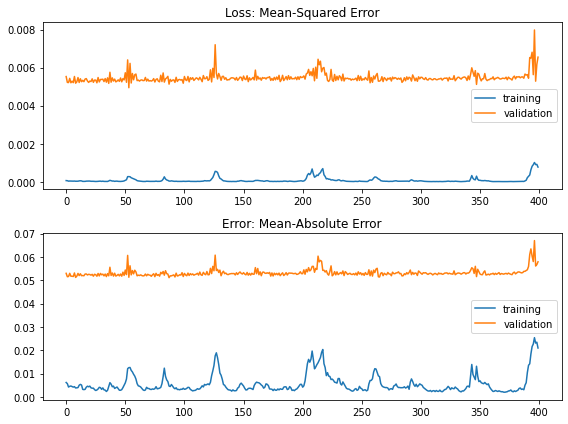

In [123]:
fig, axes = plt.subplots(2, 1, figsize = (8, 6)) # figsize = (width, height)

# Plot loss during training
axes[0].set_title('Loss: Mean-Squared Error')
axes[0].plot(history.history['loss'], label = 'training')
axes[0].plot(history.history['val_loss'], label = 'validation')
axes[0].legend()


# Plot the error during training
axes[1].set_title('Error: Mean-Absolute Error')
axes[1].plot(history.history['mae'], label = 'training')
axes[1].plot(history.history['val_mae'], label = 'validation')
axes[1].legend()

fig.tight_layout()
plt.show()


fig.savefig('Results/Plot_loss_and_error.png')

## Save or load the trained model

In [122]:
from keras.models import load_model

# Save the model we just trained earlier
my_model.save("my_linear_model")

# Load the pre-trained model
reconstructed_model = load_model("my_linear_model")

reconstructed_model.summary()

INFO:tensorflow:Assets written to: my_linear_model\assets
Model: "regression_net_v2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


## Correlation Report
#### Warning: Either classification report or confusion matrix is not used for regression prediction!
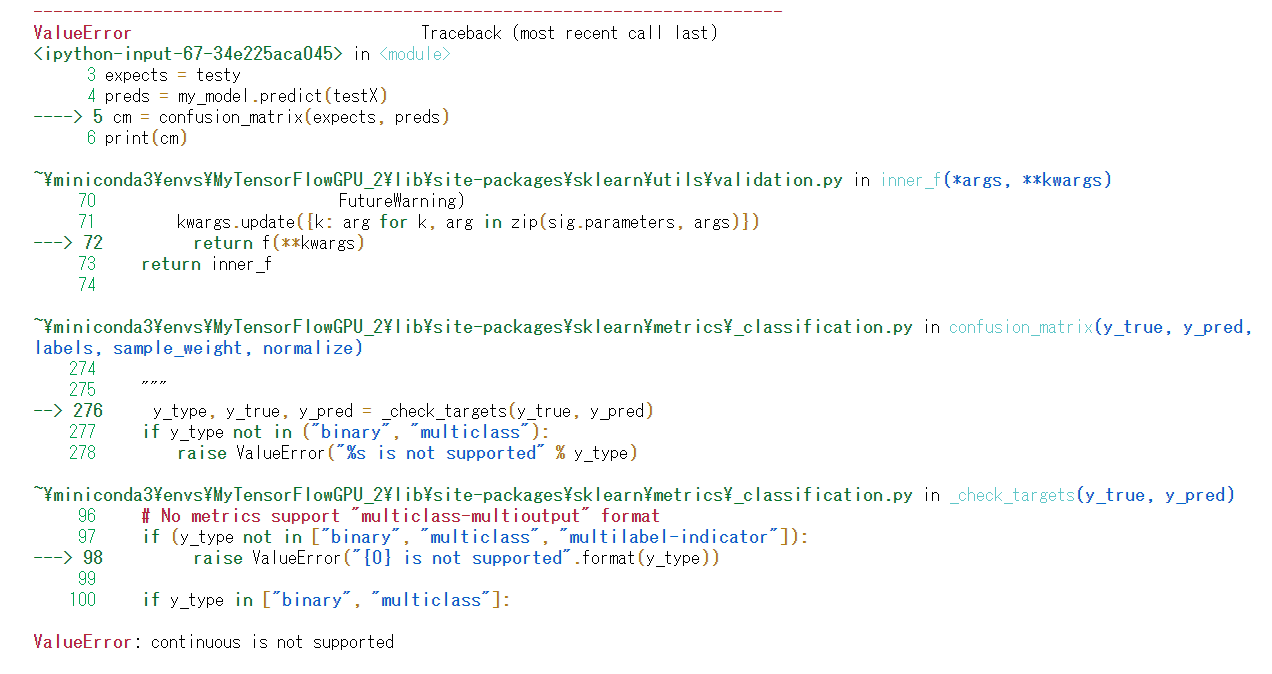

In [67]:
from sklearn.metrics import confusion_matrix

expects = testy
preds = my_model.predict(testX)
cm = confusion_matrix(expects, preds)
print(cm)

ValueError: continuous is not supported

## Predicting by the model manually

In [117]:
manual_features = testX[:5, :]
manual_preds = my_model(manual_features)
manual_expects = testy[:5]


# Datatype check
manual_preds = manual_preds.numpy()
# print(type(manual_preds)) # eager tensor converted to numpy array
manual_preds = manual_preds.reshape(5)
# print(manual_preds.shape)

manual_expects = manual_expects.to_numpy()
# print(type(manual_expects)) # pandas series converted to numpy array
manual_expects = manual_expects.reshape(5)
# print(manual_expects.shape)
      
# print('Predictions:')
# print(manual_preds)
# print('\r\n\r\nActual:')
# print(manual_expects)

# Integrate to a dataframe for comparison
print('Comparing between actual and prediction data...\r\n')
compare_df = pd.DataFrame({'Prediction': manual_preds, 'Actual': manual_expects, 'Error': abs(manual_expects - manual_preds)})
print(compare_df)

Comparing between actual and prediction data...

   Prediction  Actual     Error
0    0.703819    0.69  0.013819
1    0.873691    0.78  0.093691
2    0.766498    0.76  0.006498
3    0.712129    0.52  0.192129
4    0.893443    0.90  0.006557
